In [144]:
import matplotlib.pyplot as plt
import math
import random


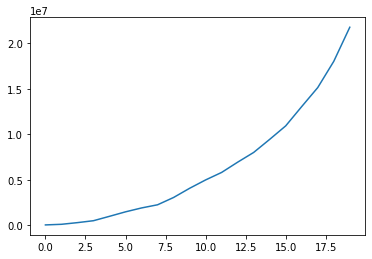

In [145]:
plt.plot(stakers)

[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000, 1210000, 1440000, 1690000, 1960000, 2250000, 2560000, 2890000, 3240000, 3610000, 4000000]
28700000


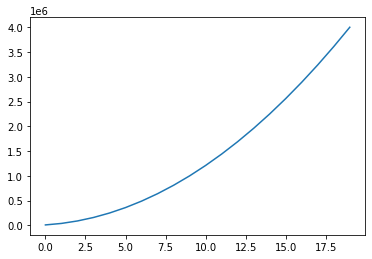

In [146]:


stakers=[]
numStakers=20
for i in range(1,numStakers+1):
    stakers.append(10000*i*i)
    
print(stakers)
stakersBefore = stakers.copy()
print(sum(stakers))
plt.figure(0)

plt.plot(stakers)
epochs=100000
dynastyEpochs=1
exposure=10000
minStake=1000
roll=0.1
tolerance = 0
blockReward = 1000

rewardPool=0
stakes=[stakers]
    
def vote():
    if random.random()<roll:
        return 200
    else:
        return 100
    
def penalty(stake):
    return stake//exposure

def rewards(stake, stakeGettingReward):
    return (stake*rewardPool)//stakeGettingReward

def chooseblockProposer(stakers):
    winner = math.floor(random.randrange(sum(stakers)))
    #print(winner)
    sortedStakers=sorted(stakers)
    
    agg=0
    for i in range(len(stakers)):
        agg+=sortedStakers[len(stakers)-i-1]
        if agg>winner:
            return len(stakers)-i-1
        


    

128699357
winners [15, 87, 287, 513, 751, 1046, 1547, 2087, 2824, 3229, 4044, 4805, 5439, 6816, 7789, 9189, 9895, 11526, 13270, 14841]
[15808, 92383, 323005, 584323, 895597, 1276932, 1865918, 2503734, 3442737, 3959980, 4911865, 5838579, 6680446, 8407559, 9516694, 11615762, 12696086, 15260738, 17714897, 21096314]
range(0, 20)


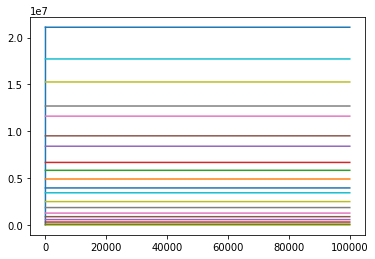

<Figure size 432x288 with 0 Axes>

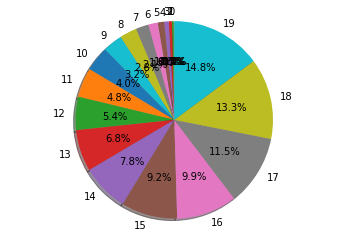

<Figure size 432x288 with 0 Axes>

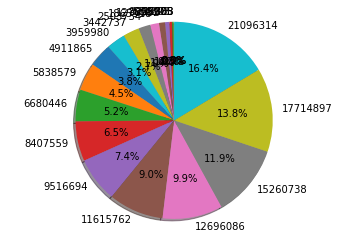

[15808, 92383, 323005, 584323, 895597, 1276932, 1865918, 2503734, 3442737, 3959980, 4911865, 5838579, 6680446, 8407559, 9516694, 11615762, 12696086, 15260738, 17714897, 21096314]
[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000, 1210000, 1440000, 1690000, 1960000, 2250000, 2560000, 2890000, 3240000, 3610000, 4000000]
1.5808
2.309575
3.5889444444444445
3.65201875
3.582388
3.5470333333333333
3.807995918367347
3.912084375
4.250292592592593
3.95998
4.059392561983471
4.05456875
3.9529266272189347
4.289570918367347
4.229641777777778
4.53740703125
4.393109342560554
4.7101043209876545
4.907173684210527
5.2740785


In [147]:

winners=[0]*numStakers

def main():
    rewardPool=0
    rewards=[0]*numStakers

    for i in range(epochs):

        votes=[]
        #print(i)
        #print(stakers)
        #print("rewardPool", rewardPool)

        #print(sum(stakers)-sum(stakersBefore))
        ## VOTE ##
        for j in range(len(stakers)):
            if stakers[j]<minStake:
                votes.append(0)
                continue
            votes.append(vote())

        #print(votes)
        
        uVotes=set(votes)
        ## WeightedVotes ##
        wVotes={}
        weights=[]
        for j in uVotes:
            weight = 0
            if j==0:
                continue
            for k in range(len(votes)):

                if j==votes[k]:
                    weight+=stakers[k]
                wVotes[j]=weight
        #print(wVotes)
                  
        totalStake=sum(stakers)
        medianWeight = totalStake//2
        lowerCutoffWeight = totalStake//4
        higherCutoffWeight = (totalStake*3)//4
        lowerCutoff = 0
        higherCutoff = 0
        median = 0
        agg=0
        for k,v in wVotes.items():
            agg+=v
            #print(k,v)
            if lowerCutoff == 0 and agg >= lowerCutoffWeight:
                lowerCutoff = k
            if median == 0 and agg >= medianWeight:
                median = k    
            if higherCutoff == 0 and agg >= higherCutoffWeight:
                higherCutoff = k
        #print(lowerCutoff, median, higherCutoff)

        ## PENALTY ##
        stakeGettingReward=0
        for j in range(len(stakers)):
            if stakers[j]<minStake:
                continue
            if votes[j]<lowerCutoff or votes[j]>higherCutoff:
                penalty = stakers[j]//exposure
                stakers[j]-=penalty
                rewardPool+=penalty
            else:
                rewards[j]+=1
        
        ## BLOCKREWRD ##
        winner = chooseblockProposer(stakers)
        #print(winner)
        winners[winner]+=1
        #print('winners',winners)
        #print(stakers)
        stakers[winner]+=blockReward
        #print(stakers)

        
        ## REWARD ##
        #print("rewardPool", rewardPool)
        #print("rewards",rewards)
        if (i%dynastyEpochs==0):
            #print("lets reward")
            rewardLastDynasty = rewardPool
            for j in range(len(stakers)):
                reward = (rewardLastDynasty*stakers[j]*rewards[j])//(dynastyEpochs*totalStake)
                
                stakers[j]+=reward
                rewardPool-= reward
            rewards=[0]*numStakers

        stakes.append(stakers)

    
    
main()
print(sum(stakers))
plt.plot(stakers)
plt.figure(1)

plt.plot(stakes)

plt.figure(2)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = range(len(stakers))

print('winners',winners)
print(stakers)
print(labels)
fig1, ax1 = plt.subplots()
ax1.pie(winners, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

plt.figure(3)

fig2, ax2 = plt.subplots()
ax2.pie(stakers, labels=stakers, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print((stakers))
print((stakersBefore))

for i in range(len(stakers)):
    print(stakers[i]/stakersBefore[i])